In [1]:
# import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

### Conect to the database

In [2]:
# connect to database

conn = sqlite3.connect('../data/prod_sample.db')

In [3]:
conn

In [4]:
# identify tables in database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stock_description',), ('online_retail_history',)]


### Online Retail History Table Exploration

In [5]:
# write sql query to select online retail history data

query = """select *
          from online_retail_history
          where CustomerID is not null
           and Price < 20
           and Quantity > 0
"""

In [6]:
# use the read_sql function in pandas to read a query into a DataFrame

online_retail_history = pd.read_sql(query, conn)
online_retail_history.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom


In [7]:
# check the structure

online_retail_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396802 entries, 0 to 396801
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      396802 non-null  object 
 1   StockCode    396802 non-null  object 
 2   Quantity     396802 non-null  int64  
 3   InvoiceDate  396802 non-null  object 
 4   Price        396802 non-null  float64
 5   CustomerID   396802 non-null  object 
 6   Country      396802 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.2+ MB


### Price Variable

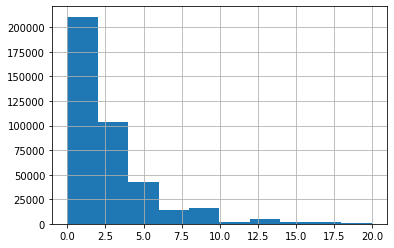

In [8]:
# check the distribution of the numerical variables

online_retail_history.Price.hist();

# is it normally distributed or positively or negatively skewed?

In [9]:
# can also look at some summary statistics for this variable

online_retail_history.Price.describe()

# what is the minimum

count    396802.000000
mean          2.807251
std           2.783196
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: Price, dtype: float64

Activity: can you calculate the UB and LB for Price Variable?

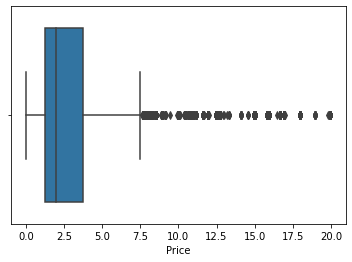

In [10]:
# visualise the price variable as a boxplot

sns.boxplot(x = online_retail_history.Price);


In [11]:
q1 = np.percentile(online_retail_history.Price, 25)
q3 = np.percentile(online_retail_history.Price, 75)
iqr = q3 - q1

ub = q3 + 1.5*iqr
lb = q1 - 1.5*iqr

print("The lower bound is:", lb)
print("The upper bound is:", ub)

The lower bound is: -2.5
The upper bound is: 7.5


In [12]:
# rows of data where Price is identified as an outlier

online_retail_history[(online_retail_history.Price > ub) | (online_retail_history.Price <lb)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
5,536365,22752,2,2010-12-01 08:26:00,7.65,u1785,United Kingdom
20,536367,22622,2,2010-12-01 08:34:00,9.95,u13047,United Kingdom
23,536367,21777,4,2010-12-01 08:34:00,7.95,u13047,United Kingdom
24,536367,48187,4,2010-12-01 08:34:00,7.95,u13047,United Kingdom
45,536370,POST,3,2010-12-01 08:45:00,18.00,u12583,France
...,...,...,...,...,...,...,...
396678,581578,22622,6,2011-12-09 12:16:00,11.95,u12713,Germany
396723,581579,22941,4,2011-12-09 12:19:00,8.50,u17581,United Kingdom
396744,581580,22894,2,2011-12-09 12:20:00,9.95,u12748,United Kingdom
396784,581586,21217,24,2011-12-09 12:49:00,8.95,u13113,United Kingdom


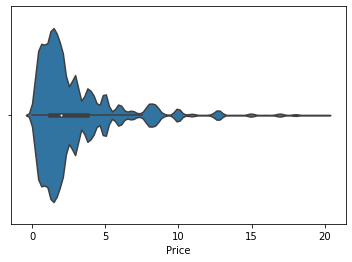

In [14]:
# violin plot

sns.violinplot(x = online_retail_history.Price);

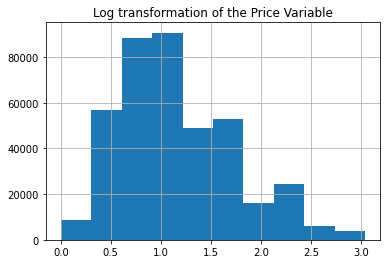

In [13]:
# can use logarithms to transform the data

np.log(online_retail_history.Price + 1).hist()
plt.title("Log transformation of the Price Variable");

### Numerical data exploration

In [15]:
# descriptive stats for all numerical variables

online_retail_history.describe()

,Quantity,Price
count,396802.000000,396802.000000
mean,13.052550,2.807251
std,180.673988,2.783196
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,19.960000


In [16]:
# correlations

online_retail_history.corr()

# what is the relationship between price and quantity?

,Quantity,Price
Quantity,1.000000,-0.029261
Price,-0.029261,1.000000


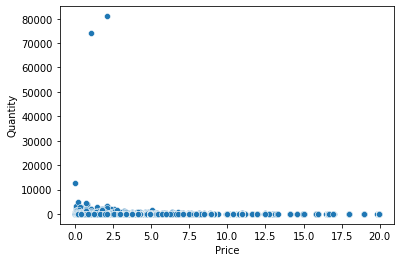

In [17]:
sns.scatterplot(data=online_retail_history, x="Price", y="Quantity");

# no correlation between price and quantity


### Non numerical data exploration

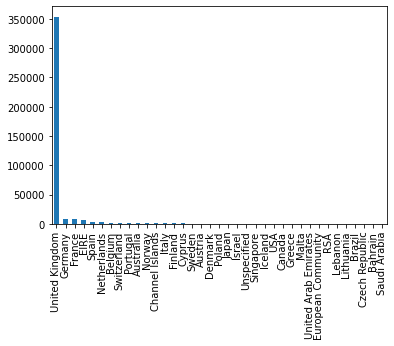

In [18]:
# bar chart vs histogram

online_retail_history.Country.value_counts().plot(kind = 'bar');